In [1]:
import pickle
import matplotlib.pyplot as plt

[('UA', 171.0), ('SE', 168.0), ('IT', 156.0), ('AU', 151.0), ('NO', 128.0), ('AZ', 127.0), ('LV', 107.0), ('AM', 107.0), ('EE', 105.0), ('MT', 99.0), ('BE', 98.0), ('GR', 91.0), ('FI', 90.0), ('DK', 88.0), ('IE', 82.0), ('IS', 82.0), ('RS', 70.0), ('CH', 64.0), ('DE', 57.0), ('PT', 53.0), ('GE', 49.0), ('GB', 48.0), ('ES', 46.0), ('LT', 45.0), ('FR', 40.0), ('SM', 32.0)]


/var/folders/82/6xch38_95_d545t14cp867pc0000gr/T/ipykernel_62167/1662150688.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


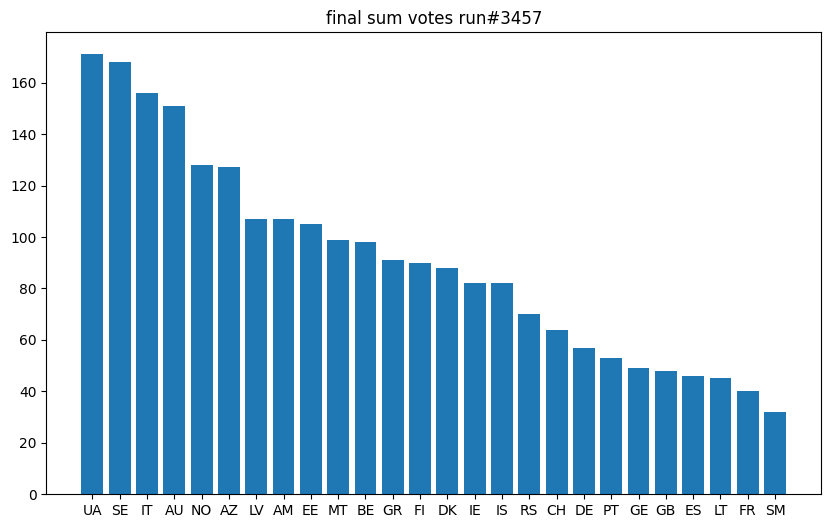

In [3]:
with open('simulation_results/2023-04-14 19:42:04.697015 -- model_3_voter_bias_vector_no_preds_3000_samples_4_chains_1998-2022.json_12000_sim_runs.pkl','rb') as f:
    results_dict = pickle.load(f)

run = 3457
print(results_dict['f_ranked_total_points'][run])
fig,ax = plt.subplots()
ax.set_title(f'final sum votes run#{run}')
f_data = list(zip(*results_dict['f_ranked_total_points'][run]))
ax.bar(f_data[0],f_data[1])
fig.set_size_inches(10,6)
fig.show()

/var/folders/82/6xch38_95_d545t14cp867pc0000gr/T/ipykernel_62167/2780349540.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


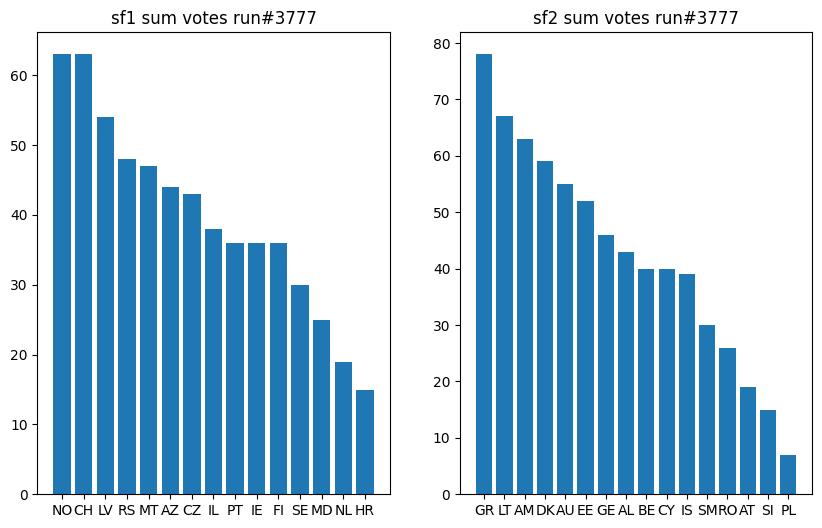

In [4]:
run = 3777
fig,ax = plt.subplots(ncols=2, nrows=1)
ax[0].set_title(f'sf1 sum votes run#{run}')
sf1_data = list(zip(*results_dict['sf1_ranked_total_points'][run]))
ax[0].bar(sf1_data[0],sf1_data[1])
ax[1].set_title(f'sf2 sum votes run#{run}')
sf2_data = list(zip(*results_dict['sf2_ranked_total_points'][run]))
ax[1].bar(sf2_data[0],sf2_data[1])
fig.set_size_inches(10,6)
fig.show()

In [7]:
# two of the functions from the comp sim edited to be free body functions to reprint the results
def print_occurances(occurances):
        occurs = {}
        for country in occurances:
            occurs[country] = ((occurs.get(country, (0,None))[0] + 1), None)
        # establish occurance rates
        for country,(count,event_rate) in occurs.items():
            occurs[country] = (count,(count / n_runs))
        
        sorted_occurs = sorted(occurs.items(), key=lambda x:x[1][0], reverse=True )
        for i,(w,(count,event_rate)) in enumerate(sorted_occurs):
            print(f'#{i+1} {w} {100*event_rate}%')

def print_stats():
        # explore winners
        winners = []
        for run in range(n_runs):
            # take winning country name (results = [[(2charcode, sum_votes), ...more_countries...], ...more_sim_runs...])
            winners.append(results_dict['f_ranked_total_points'][run][0][0])
        print(f'Competition winners ranked by win rate across {n_runs} simulations:')
        print_occurances(winners)
        
        # explore 'top-5' acheivement
        top5 = []
        for run in range(n_runs):
            top5.extend(list(map(lambda x:x[0], results_dict['f_ranked_total_points'][run][:5])))
        print(f'Top-5 appearances ranked by frequency across {n_runs} simulations:')
        print_occurances(top5)

In [8]:
n_runs = len(results_dict['f_ranked_total_points'])
print_stats()

Competition winners ranked by win rate across 12000 simulations:
#1 UA 52.05833333333333%
#2 SE 26.19166666666667%
#3 IT 18.108333333333334%
#4 AU 3.3666666666666663%
#5 MD 0.2%
#6 AZ 0.05833333333333334%
#7 NL 0.008333333333333333%
#8 CZ 0.008333333333333333%
Top-5 appearances ranked by frequency across 12000 simulations:
#1 UA 99.99166666666667%
#2 IT 99.99166666666667%
#3 AU 97.68333333333334%
#4 NO 56.266666666666666%
#5 AZ 53.45833333333333%
#6 SE 39.358333333333334%
#7 CZ 16.03333333333333%
#8 LV 13.516666666666666%
#9 EE 9.141666666666666%
#10 IL 8.891666666666667%
#11 RO 1.325%
#12 MD 1.325%
#13 BE 0.9083333333333334%
#14 NL 0.8333333333333334%
#15 MT 0.7666666666666666%
#16 LT 0.18333333333333332%
#17 CH 0.17500000000000002%
#18 GR 0.10833333333333332%
#19 AM 0.03333333333333333%
#20 FI 0.008333333333333333%
